# Content
<ol>
  <li>Problem and Objective</li>
  <li>Data Preparation and Cleaning</li>
  <li> Exploratory Data Analysis </li>
  <li>Supervised Method</li>
  <li>Unsupervised Method</li>
  <li>Finding and Conclusion </li>
</ol>

# 1. Problem and Objective
Based on the Formula 1 World Championship (1950 - 2023) dataset from Kaggle https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020 we aim to build model to predict:
<ul>
  <li>The total points over a year for each driver using supervised learning methods</li>
   <li>Comparing Supervised and Unsupervised Methods by predicting the label for each driver/li>
  
</ul>

# 2. Data Preparation and Cleaning

In this section, we aim to check for missing/uncompleted values, remove columns that are insignificant in predicting and engineer new feature

In [1]:
import pandas as pd
import numpy as np

#visualization tools
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime
sns.set()

from os import listdir
from os.path import isfile, join

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2.1 Construting Master Dataframe

In this subsection, we build a master dataframe from various csv file (i.e. drivers.csv, results.csv, circuits.csv)

In [2]:
mypath = '/kaggle/input/formula-1-world-championship-1950-2020'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for file in onlyfiles:
    print(file) #names of the all datasets

races.csv
constructor_results.csv
drivers.csv
constructors.csv
lap_times.csv
status.csv
driver_standings.csv
seasons.csv
pit_stops.csv
sprint_results.csv
constructor_standings.csv
results.csv
circuits.csv
qualifying.csv


### 2.1.1 Read Files

In [3]:
drivers = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv')
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [4]:
driver_result = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/results.csv')
driver_result.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [5]:
status= pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/status.csv')
status
# Create a new column 'Success' and set default value as 'Fail'
status['FinishRaceRate'] = 'Fail'

# Update 'Success' column based on the conditions
status.loc[status['status'] == 'Finished', 'FinishRaceRate'] = 'Success'
status.loc[status['status'].str.contains('\+'), 'FinishRaceRate'] = 'Delayed'

# Print the updated DataFrame
status.head()


,statusId,status,FinishRaceRate
0,1,Finished,Success
1,2,Disqualified,Fail
2,3,Accident,Fail
3,4,Collision,Fail
4,5,Engine,Fail


In [6]:
driver_result = pd.merge(driver_result, status, on ='statusId')
driver_result.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status,FinishRaceRate
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Finished,Success
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,Finished,Success
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,Finished,Success
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,Finished,Success
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,Finished,Success


In [7]:
import pandas as pd

races = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/races.csv')
races_date = races[['date', 'circuitId', 'raceId']].copy()
races_date['date'] = pd.to_datetime(races_date['date'])

# Eliminating Uncompleted data - Year 2023 and 2022
races_date = races_date.loc[(races_date['date'].dt.year != 2023) & (races_date['date'].dt.year != 2022)]


In [8]:
circuits = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv')
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [9]:
driver_standings = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv')
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [10]:
laptimes = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv')
laptimes = laptimes[['raceId','driverId','lap','milliseconds']]
laptimes.head()

,raceId,driverId,lap,milliseconds
0,841,20,1,98109
1,841,20,2,93006
2,841,20,3,92713
3,841,20,4,92803
4,841,20,5,92342


In [11]:
qualifying = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv')
qualifying = qualifying[['driverId','position']]
qualifying.head()

,driverId,position
0,1,1
1,9,2
2,5,3
3,13,4
4,2,5


### 2.1.2 Merge Dataframes

In [12]:
df1 = pd.merge(driver_result, races, on ='raceId')
df_race= pd.merge(df1, drivers, on = 'driverId')
df_race.head()
#:)

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,...,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton


In [13]:
#Drop posterior data column (time, milliseconds, fastestLap, fastestLapTime, fastestLapSpeed, statusId)
posterior_data = ['laps', 'milliseconds', 'time_x', 'time_y', 'positionOrder','url_y']
df_race = df_race.drop(columns=posterior_data)
df_race.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,points,fastestLap,...,quali_time,sprint_date,sprint_time,driverRef,number_y,code,forename,surname,dob,nationality
0,1,18,1,1,22,1,1,1,10.0,39,...,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,27,19,1,1,22,9,5,5,4.0,53,...,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
2,57,20,1,1,22,3,13,13,0.0,25,...,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
3,69,21,1,1,22,5,3,3,6.0,20,...,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
4,90,22,1,1,22,3,2,2,8.0,31,...,\N,\N,\N,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British


In [14]:
#Drop redundant positon and positionText column
df_race = df_race.drop(columns=['position',  'positionText', 'number_x', 'sprint_date', 'sprint_time','statusId', 'driverRef', 'number_y', 'nationality', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'quali_date', 'quali_time', 'fp3_date', 'fp3_time', 'name'])

## 2.1.3 Feature Engineer

## Add a new column and calculate the current Age for each driver

In [15]:
#Change data type from string to datetime
df_race['dob'] = pd.to_datetime(df_race['dob'])
df_race['date'] = pd.to_datetime(df_race['date'])

In [16]:
#Add age column to dataframe
#dates = df_race['date']-df_race['dob']
dates = datetime.today()-df_race['dob']
age = dates.dt.days/365
df_race['age'] = round(age)
df_race.head()

,resultId,raceId,driverId,constructorId,grid,points,fastestLap,rank,fastestLapTime,fastestLapSpeed,...,FinishRaceRate,year,round,circuitId,date,code,forename,surname,dob,age
0,1,18,1,1,1,10.0,39,2,1:27.452,218.300,...,Success,2008,1,1,2008-03-16,HAM,Lewis,Hamilton,1985-01-07,38.0
1,27,19,1,1,9,4.0,53,3,1:35.462,209.033,...,Success,2008,2,2,2008-03-23,HAM,Lewis,Hamilton,1985-01-07,38.0
2,57,20,1,1,3,0.0,25,19,1:35.520,203.969,...,Delayed,2008,3,3,2008-04-06,HAM,Lewis,Hamilton,1985-01-07,38.0
3,69,21,1,1,5,6.0,20,3,1:22.017,204.323,...,Success,2008,4,4,2008-04-27,HAM,Lewis,Hamilton,1985-01-07,38.0
4,90,22,1,1,3,8.0,31,2,1:26.529,222.085,...,Success,2008,5,5,2008-05-11,HAM,Lewis,Hamilton,1985-01-07,38.0


#### winRate - Likelihood of winning a race

In [17]:
# INITIALISATION
df_driver = drivers.copy()
df_driver['totalWins'] = 0

race_dates = races[['raceId','date']]
# CLEANING AND ADDING

# adding dates to each race
driver_standings = driver_standings.merge(race_dates[['raceId', 'date']], how='left', on='raceId')

# Convert the "date" column to a datetime object
driver_standings['date'] = pd.to_datetime(driver_standings['date'])

# Create a new column 'year' to extract the year from the 'date' column
driver_standings['year'] = driver_standings['date'].dt.year
# driver_standings_csv.head()

# count the number of races each driver has driven in
num_races_per_driver = driver_standings.groupby('driverId')['raceId'].nunique()
num_races_per_driver_df = num_races_per_driver.reset_index()
num_races_per_driver_df = num_races_per_driver_df.rename(columns={'raceId': 'totalRaces'})
# num_races_per_driver_df.head()

# FINDING TOTAL WINS FOR EACH DRIVER
for index, row in df_driver.iterrows():
    driverId = row['driverId']

    # filtering out rows with ['driverId'] == driverId
    driver_standings_csv_driverId = driver_standings[driver_standings['driverId'] == driverId]

    # Group the dataframe by year and find the maximum date for each year
    latest_day_in_year = driver_standings_csv_driverId.groupby(driver_standings_csv_driverId['date'].dt.year)['date'].max()

    # Use the latest day in each year to filter the original dataframe
    filtered_dataframe = driver_standings_csv_driverId.loc[driver_standings_csv_driverId['date'].isin(latest_day_in_year)]

    total_wins = filtered_dataframe['wins'].sum()
    
    index = df_driver.index[df_driver['driverId'] == driverId].tolist()[0]
    df_driver.at[index, 'totalWins'] = total_wins


# adding dates to each race
df_driver = df_driver.merge(num_races_per_driver_df, how='left', on='driverId')

# calculate win rate and drop totalWins columns
df_driver['winRate'] = df_driver['totalWins'] / df_driver['totalRaces']
df_driver = df_driver.drop(['totalWins'], axis=1)
df_driver['dob'] = pd.to_datetime(df_driver['dob'])
df_driver['age'] =  2023- df_driver['dob'].dt.year
    
# PRINT CURRENT DATASET    
df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42


 ####  fastestLapRate - Likelihood of winning fastest lap

In [18]:
# Group the dataframe by raceId and find the index of the row with the minimum milliseconds
idx = laptimes.groupby('raceId')['milliseconds'].idxmin()

# Use the index to select the rows with the minimum milliseconds for each raceId
df_min_milliseconds = laptimes.loc[idx]

# Sort the result by raceId
df_min_milliseconds.sort_values('raceId', inplace=True)

counts = pd.DataFrame(df_min_milliseconds['driverId'].value_counts())
counts.columns = ['totalFastestLaps']
counts['driverId'] = counts.index
counts.reset_index(drop=True, inplace=True)

# adding totalFastestLaps to df maindata_wnames
df_driver = df_driver.merge(counts, how='left', on='driverId')
df_driver = df_driver.fillna(0)

# calculate fastest lap rate and drop totalFastestLaps
df_driver['fastestLapRate'] = df_driver['totalFastestLaps'] / df_driver['totalRaces']
df_driver = df_driver.drop(['totalFastestLaps'], axis=1)

# PRINT CURRENT DATASET    
df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age,fastestLapRate
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38,0.192926
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46,0.010309
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38,0.097087
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42,0.063712
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42,0.018018


 ####  qualifyingWinRate - Likelihood of winning qualifying

In [19]:
# COUNTING THE NUMBER OF QUALIFYING WINS
# Group by driverId and position, then count the number of occurrences
position_1_counts = qualifying[qualifying['position'] == 1].groupby('driverId')['position'].count().reset_index()

# Rename the 'position' column to 'position_1_count'
position_1_counts = position_1_counts.rename(columns={'position': 'position_1_count'})

# # Print the resulting DataFrame
# position_1_counts.head()

# merge
df_driver = df_driver.merge(position_1_counts, how='left', on='driverId')
df_driver = df_driver.fillna(0)

# calculate fastest lap rate and drop totalFastestLaps
df_driver['qualifyingWinRate'] = df_driver['position_1_count'] / df_driver['totalRaces']
df_driver = df_driver.drop(['position_1_count'], axis=1)

# filling in NaN values for qualifyingWinRate
df_driver.fillna(0, inplace=True)

df_driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,311.0,0.331190,38,0.192926,0.340836
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,194.0,0.000000,46,0.010309,0.005155
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,206.0,0.111650,38,0.097087,0.145631
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,361.0,0.088643,42,0.063712,0.063712
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,111.0,0.009009,42,0.018018,0.009009


# 3. Exploratory Data Analysis

In this section, we start to have first look in data and do some visualization to facilitate the analyzating process. It also help us to set up for machine learning model

In [20]:
#Number of data point
print("Number of data point for race dataframe: " + str(df_race.shape[0]))
print("Number of data point for driver dataframe: " + str(df_driver.shape[0]))

Number of data point for race dataframe: 25840
Number of data point for driver dataframe: 857


In [21]:
print("Data frame race information")
df_race.info()

print('\n\n')
print("Data frame driver information")
df_driver.info()

Data frame race information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25840 entries, 0 to 25839
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   resultId         25840 non-null  int64         
 1   raceId           25840 non-null  int64         
 2   driverId         25840 non-null  int64         
 3   constructorId    25840 non-null  int64         
 4   grid             25840 non-null  int64         
 5   points           25840 non-null  float64       
 6   fastestLap       25840 non-null  object        
 7   rank             25840 non-null  object        
 8   fastestLapTime   25840 non-null  object        
 9   fastestLapSpeed  25840 non-null  object        
 10  status           25840 non-null  object        
 11  FinishRaceRate   25840 non-null  object        
 12  year             25840 non-null  int64         
 13  round            25840 non-null  int64         
 14  circuitId 

In [22]:
# Adding two column (forename,surname) to create a single column called driver_name

df_driver['driver_name'] = df_driver['forename'] + ' ' + df_driver['surname']
df_driver = df_driver.drop(['forename', 'surname', 'url'], axis=1)
#The same for the df_race
df_race['driver_name'] = df_race['forename']+' '+df_race['surname']
df_race = df_race.drop(['forename','surname'],axis=1)

In [23]:
# Rename the column 'fastestLapSpeed ' to 'max_speed'
df_race = df_race.rename(columns={'fastestLapSpeed': 'max_speed'})

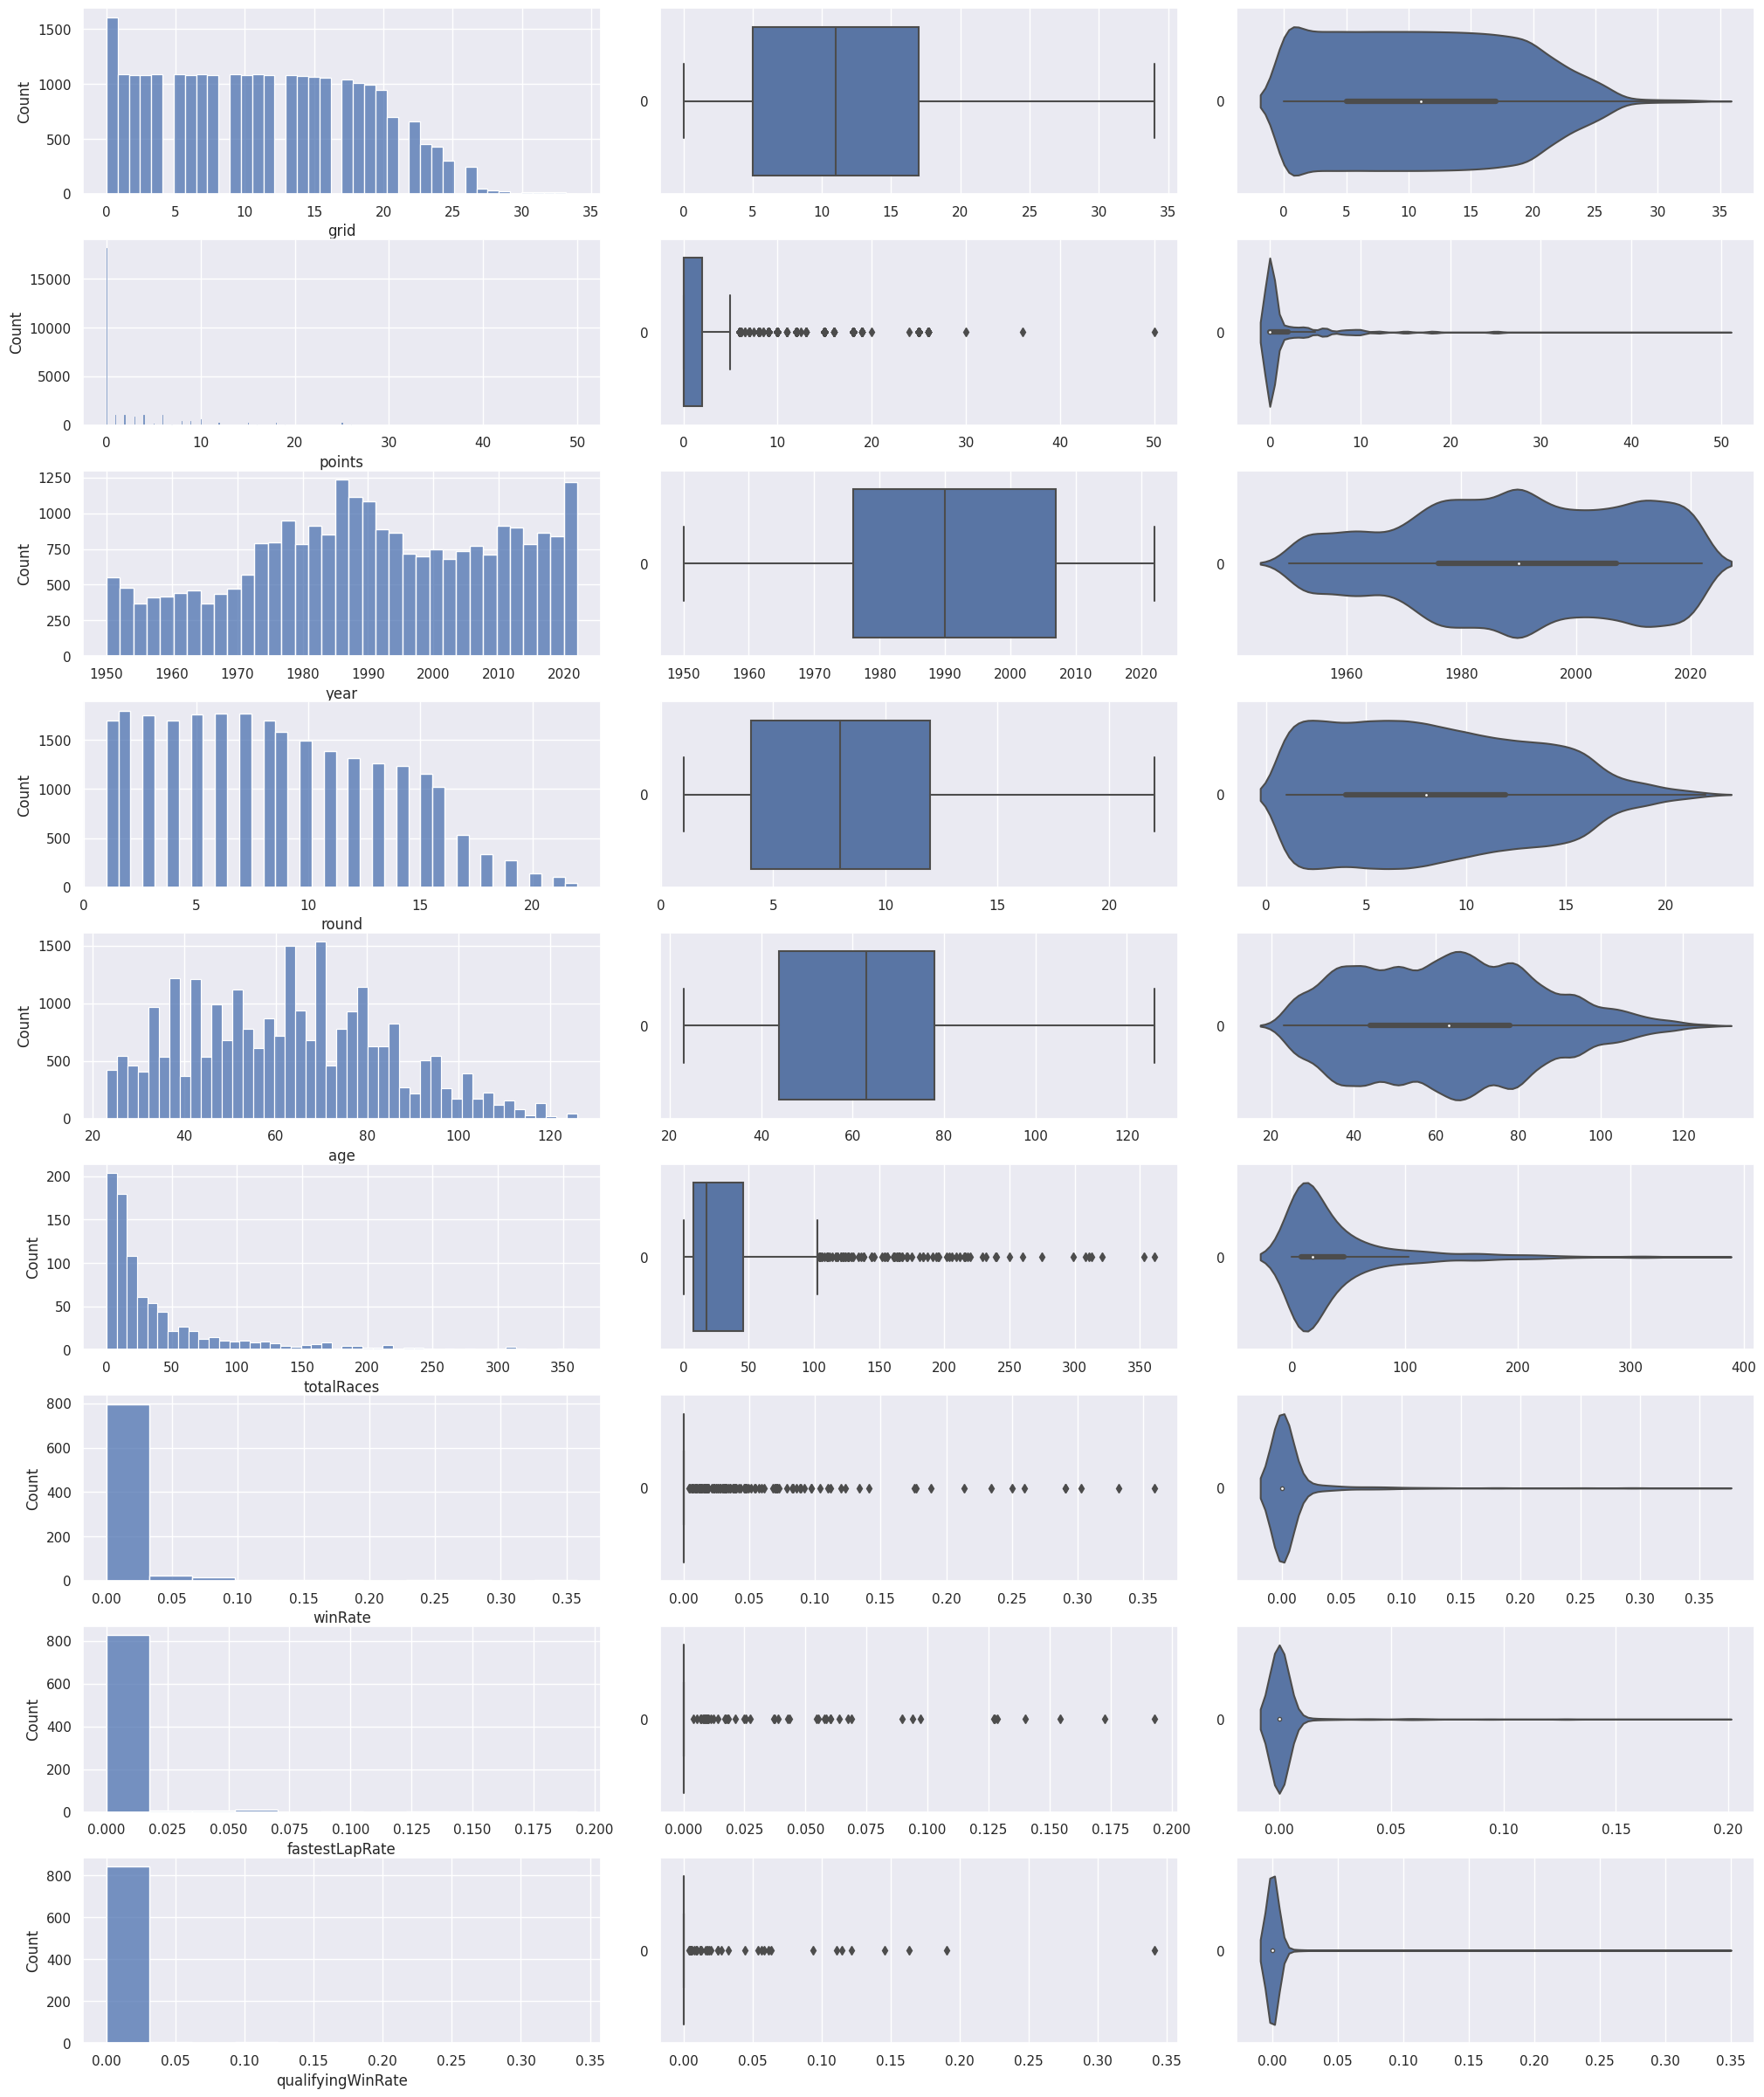

In [24]:
# plotting the distributions of the level variables
f, axes = plt.subplots(9, 3, figsize=(20, 24))

df_numeric = pd.DataFrame(df_race[['grid', 'points', 'year', 'round', 'age']])
# Format the layout so that no overlapping between titles and graphs
df_numeric_1 = pd.DataFrame(df_driver[['totalRaces', 'winRate', 'fastestLapRate', 'qualifyingWinRate']])
plt.tight_layout()
count = 0

for var in df_numeric:
    sns.histplot(data = df_numeric[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric[var], orient = "h", ax = axes[count,2])
    count += 1
    
for var in df_numeric_1:
    sns.histplot(data = df_numeric_1[var], ax = axes[count,0])
    sns.boxplot(data = df_numeric_1[var], orient = "h", ax = axes[count,1])
    sns.violinplot(data = df_numeric_1[var], orient = "h", ax = axes[count,2])
    count += 1

# Categorical Value

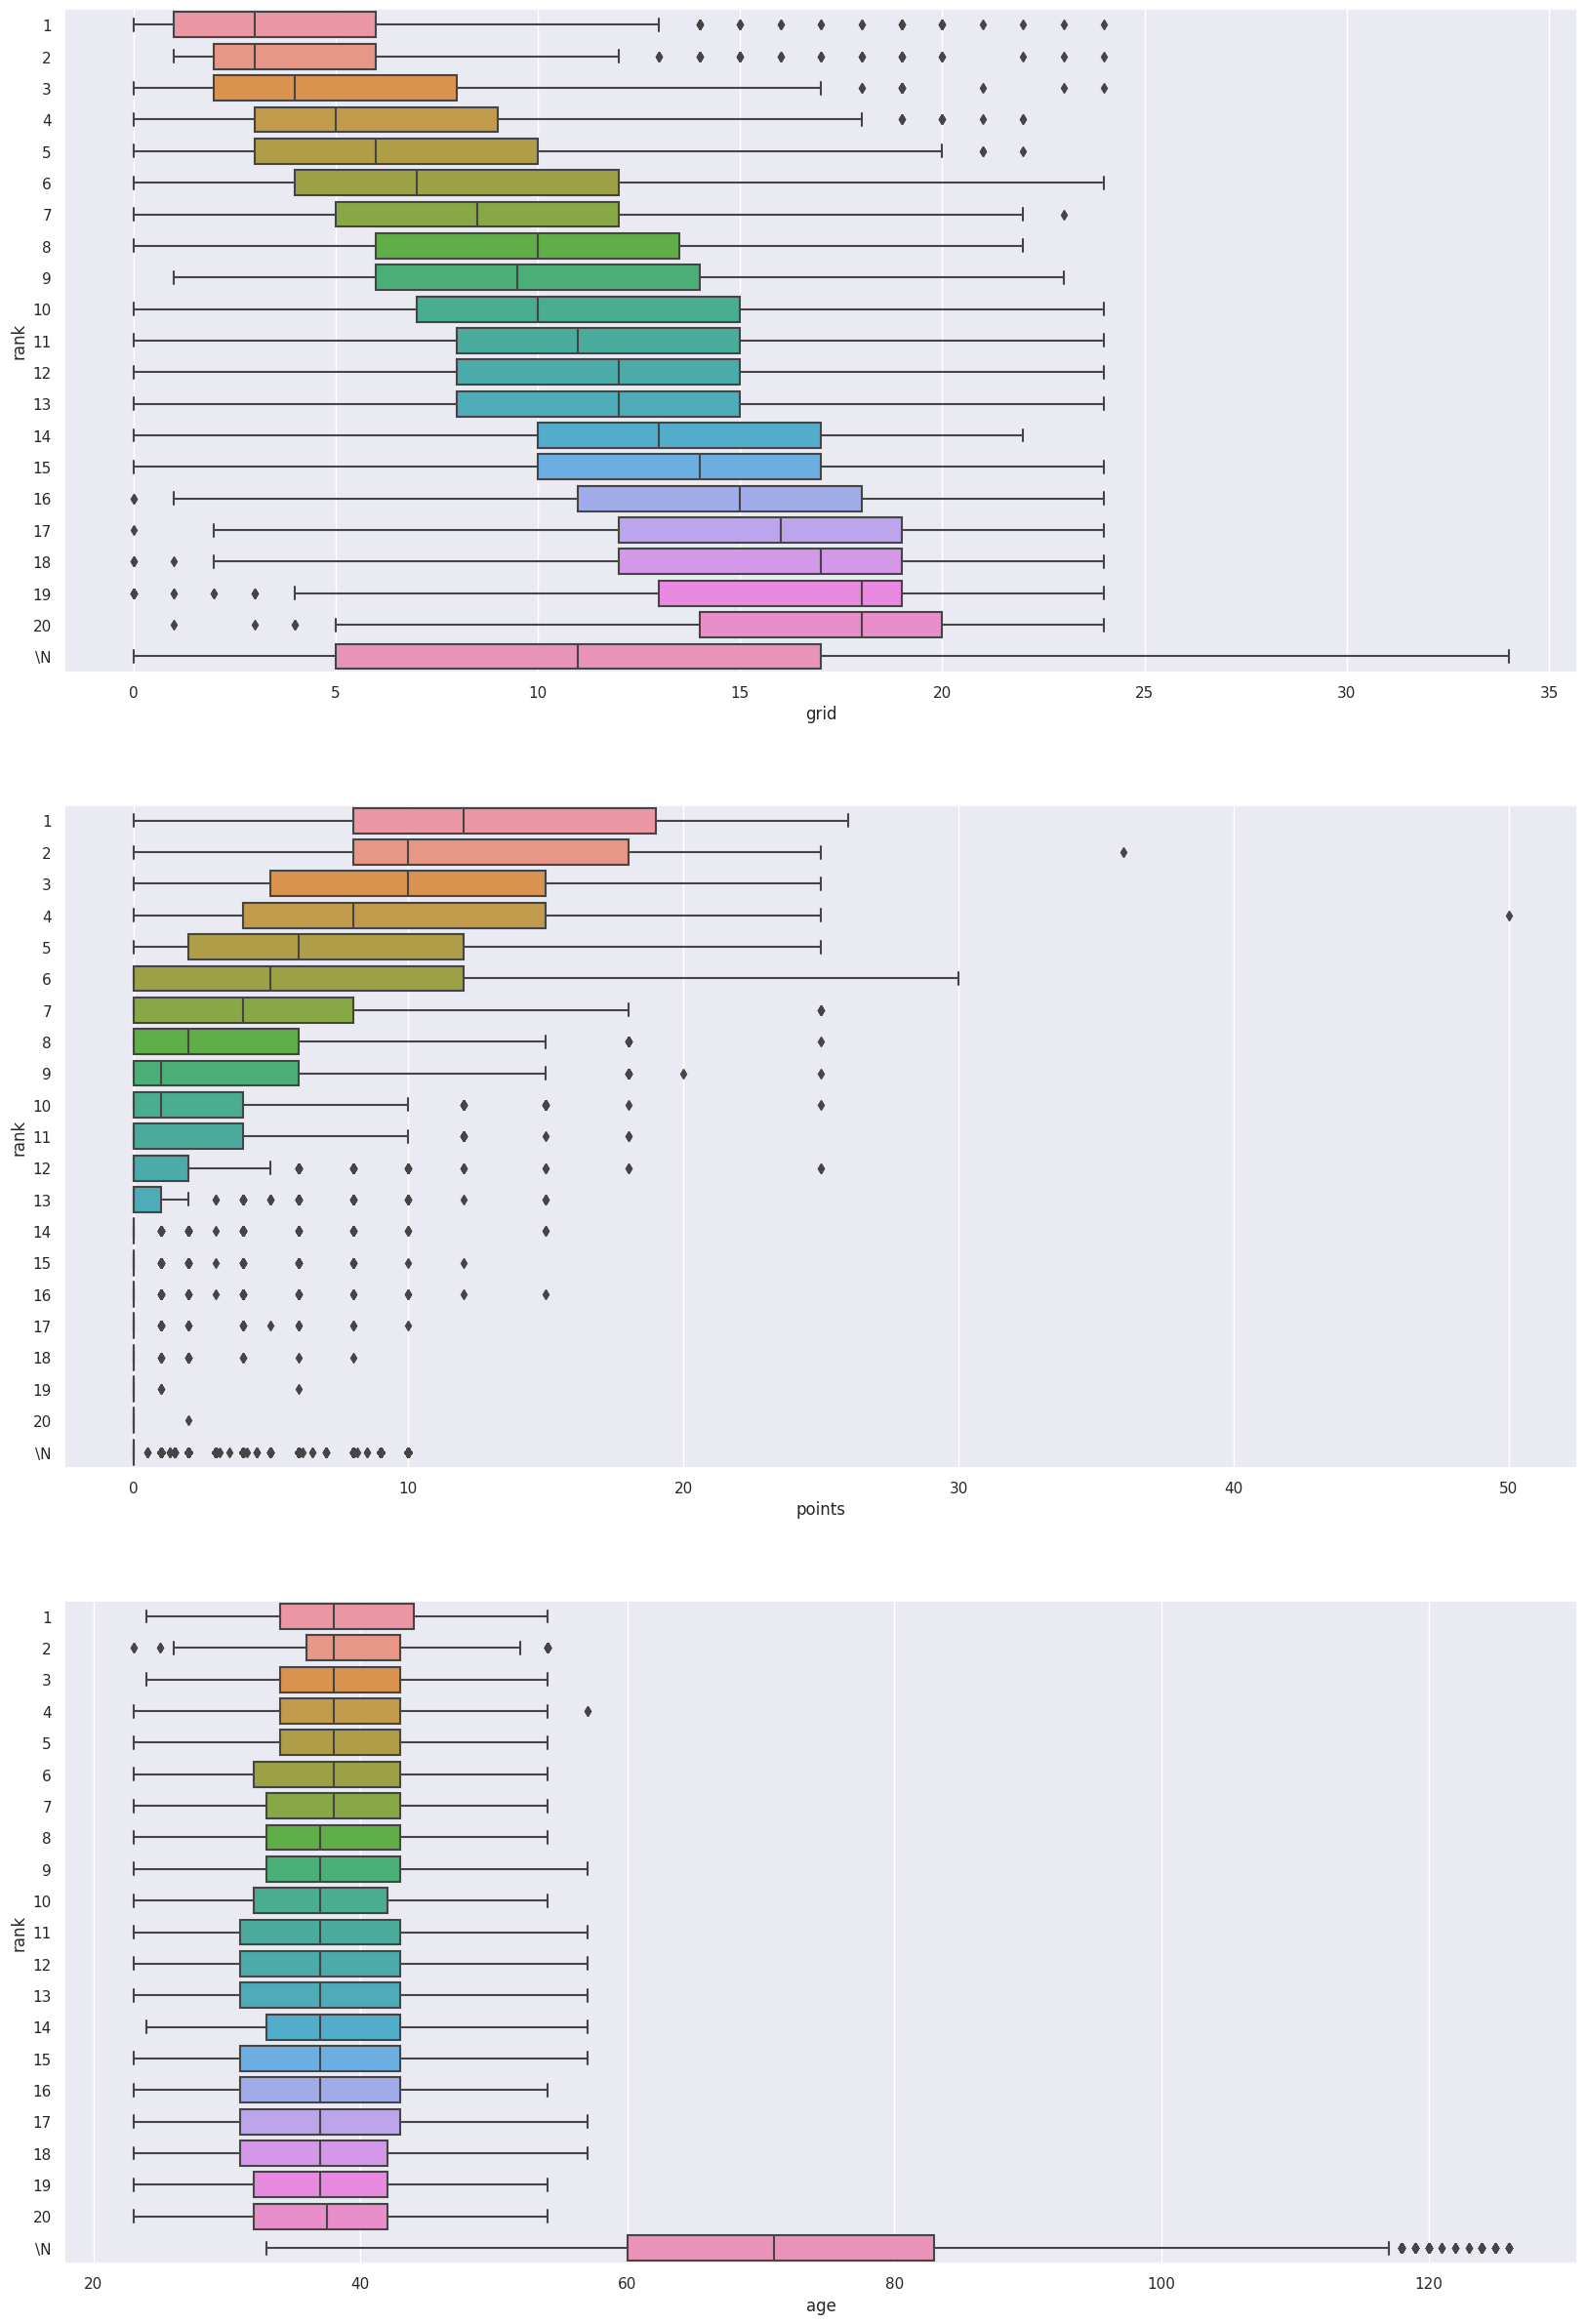

In [25]:
#Categorical Value
f, axes = plt.subplots(3, 1, figsize=(20, 30))
df_cat = pd.DataFrame(df_race[['grid', 'points', 'age', 'rank']])
count = 0
for col in df_cat:
    if col!='rank':
        sns.boxplot(data=df_race, x=col, y='rank', order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18', '19', '20', '\\N'], ax=axes[count])
        count = count + 1

In [26]:
df_race.fillna(0, inplace=True)

import numpy as np

# Replace '\\N' values with NaN
df_race.replace('\\N', np.nan, inplace=True)

# Fill null values with 0
df_race.fillna(0, inplace=True)

df_race['max_speed'] = df_race['max_speed'].astype(float)


In [27]:
#plt.figure(figsize=(10,8))
#sns.heatmap(df_race.corr(),annot=True)

# Clasify race as the first half and second half by a new variable first_half

In [28]:
#Clasify race as the first half and second half by a new variable first_half
driver_result_withdate_divided = df_race.copy()
driver_result_withdate_divided['firstHalf'] = (driver_result_withdate_divided['date'].dt.month <= 6).astype(int)
driver_result_withdate_divided
driver_result_withdate_groupby_year_divided = driver_result_withdate_divided.groupby([driver_result_withdate_divided['date'].dt.year, driver_result_withdate_divided['firstHalf'], driver_result_withdate_divided['driverId']])

In [29]:
driver_result_withdate_groupby_year_divided = driver_result_withdate_divided.groupby([driver_result_withdate_divided['date'].dt.year, driver_result_withdate_divided['firstHalf'], driver_result_withdate_divided['driverId']])

point_year_divided = driver_result_withdate_groupby_year_divided["points"].sum().unstack()


In [30]:
age_year = driver_result_withdate_groupby_year_divided["age"].mean().unstack()

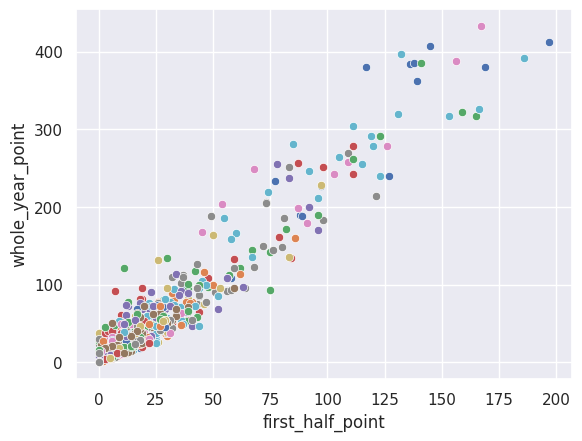

In [31]:
#Loop through each team 
#Column name is ID of each team
df_final = []
id_driver =[]
point_first_half_all = []
whole_year_point_all = []
for column in point_year_divided:
    point_year_driver_divided = point_year_divided[column].unstack()
    point_first_half = []
    whole_year_point = []
    ages = []
    age_one_year = age_year[column].unstack()
    point_year_driver_divided = pd.merge(point_year_driver_divided, age_one_year, on='date')
    #Loop through each year
    for row in point_year_driver_divided.iterrows():
        if not np.isnan(row[1][0]) and not np.isnan(row[1][1]) and (not np.isnan(row[1][2]) or not np.isnan(row[1][3])):
            if not np.isnan(row[1][2]):
                age = row[1][2]
            else:
                age = row[1][3]
            ages.append(age)
            id_driver.append(column)
            point_first_half.append(row[1][1])
            point_first_half_all.append(row[1][1])
            whole_year_point.append(row[1][0]+row[1][1])
            whole_year_point_all.append(row[1][0])
            
    new_df = pd.DataFrame({'first_half_point':point_first_half, 'ages': ages, 'whole_year_point':whole_year_point, 'id_driver':column})
    df_final.append(new_df)
    sns.scatterplot(x='first_half_point', y='whole_year_point', data=new_df)
    
df_final = pd.concat(df_final, ignore_index=True)
df_join = df_final.merge(df_driver, left_on='id_driver', right_on='driverId')


In [32]:
df_join = df_join.drop('id_driver', axis=1)

In [33]:
import pandas as pd

# Create a new column called average_points which containts the mean for whole_year_point
df_join['average_points'] = df_join.groupby('driverId')['whole_year_point'].transform('mean')
df_join.head()

,first_half_point,ages,whole_year_point,driverId,driverRef,number,code,dob,nationality,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate,driver_name,average_points
0,58.0,38.0,109.0,1,hamilton,44,HAM,1985-01-07,British,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton,269.966667
1,38.0,38.0,98.0,1,hamilton,44,HAM,1985-01-07,British,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton,269.966667
2,9.0,38.0,49.0,1,hamilton,44,HAM,1985-01-07,British,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton,269.966667
3,127.0,38.0,240.0,1,hamilton,44,HAM,1985-01-07,British,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton,269.966667
4,97.0,38.0,227.0,1,hamilton,44,HAM,1985-01-07,British,311.0,0.33119,38,0.192926,0.340836,Lewis Hamilton,269.966667


In [34]:
#display each driver once
average_points = df_join.groupby('driverId')['average_points'].mean().reset_index()
df_unique = df_join.drop_duplicates(subset='driverId', keep='first').drop(columns='average_points')
df_unique = df_unique.merge(average_points, on='driverId')
df_unique.head()

,first_half_point,ages,whole_year_point,driverId,driverRef,number,code,dob,nationality,totalRaces,winRate,age,fastestLapRate,qualifyingWinRate,driver_name,average_points
0,58.0,38.0,109.0,1,hamilton,44,HAM,1985-01-07,British,311.0,0.331190,38,0.192926,0.340836,Lewis Hamilton,269.966667
1,0.0,46.0,0.0,2,heidfeld,\N,HEI,1977-05-10,German,194.0,0.000000,46,0.010309,0.005155,Nick Heidfeld,23.000000
2,4.0,38.0,4.0,3,rosberg,6,ROS,1985-06-27,German,206.0,0.111650,38,0.097087,0.145631,Nico Rosberg,144.954545
3,0.0,42.0,0.0,4,alonso,14,ALO,1981-07-29,Spanish,361.0,0.088643,42,0.063712,0.063712,Fernando Alonso,108.473684
4,12.0,42.0,30.0,5,kovalainen,\N,KOV,1981-10-19,Finnish,111.0,0.009009,42,0.018018,0.009009,Heikki Kovalainen,17.500000


In [35]:
df_training_data= df_unique[['driverId','driver_name','ages', 'totalRaces', 'winRate', 'fastestLapRate', 'qualifyingWinRate','average_points']]

df_training_data.head()

,driverId,driver_name,ages,totalRaces,winRate,fastestLapRate,qualifyingWinRate,average_points
0,1,Lewis Hamilton,38.0,311.0,0.331190,0.192926,0.340836,269.966667
1,2,Nick Heidfeld,46.0,194.0,0.000000,0.010309,0.005155,23.000000
2,3,Nico Rosberg,38.0,206.0,0.111650,0.097087,0.145631,144.954545
3,4,Fernando Alonso,42.0,361.0,0.088643,0.063712,0.063712,108.473684
4,5,Heikki Kovalainen,42.0,111.0,0.009009,0.018018,0.009009,17.500000


# Create the driver_performance

In [36]:

import numpy as np

conditions = (df_training_data['average_points'] > 50) & (df_training_data['qualifyingWinRate'] > 0.05) & (df_training_data['fastestLapRate'] > 0.001)
df_training_data.loc[conditions, 'driver_performance'] = 'pro-driver'
df_training_data.loc[~conditions, 'driver_performance'] = 'noob'


/tmp/ipykernel_21/730020763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training_data.loc[conditions, 'driver_performance'] = 'pro-driver'


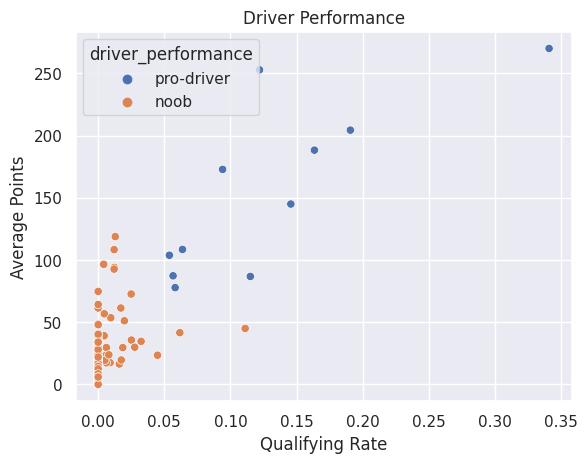

In [37]:
import seaborn as sns

# Visualizing the clusters
sns.scatterplot(x='qualifyingWinRate', y='average_points', hue='driver_performance', data=df_training_data)
plt.xlabel('Qualifying Rate')
plt.ylabel('Average Points')
plt.title('Driver Performance')
plt.show()

<AxesSubplot: >

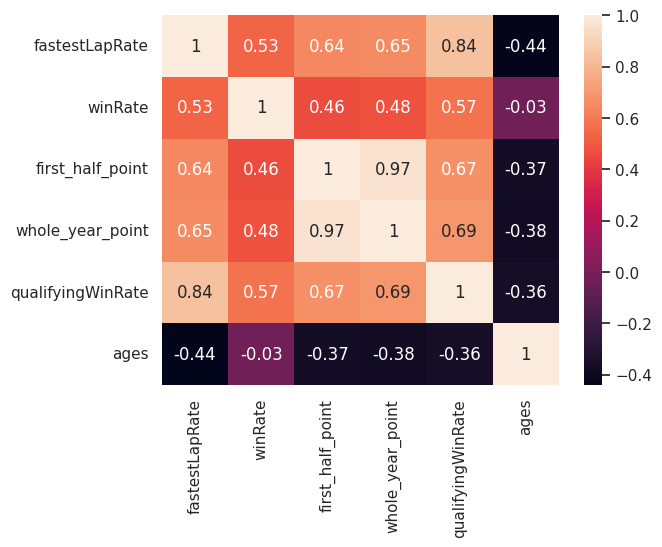

In [38]:
df_djoin= df_join[['fastestLapRate','winRate', 'first_half_point','whole_year_point','qualifyingWinRate' ,'ages']]
sns.heatmap(df_djoin.corr(),annot=True)

In [39]:
import pandas as pd

# Use the isnull() method to check for null values
null_values = df_join.isnull().sum()

# Display the count of null values for each column
print(null_values)

first_half_point     0
ages                 0
whole_year_point     0
driverId             0
driverRef            0
number               0
code                 0
dob                  0
nationality          0
totalRaces           0
winRate              0
age                  0
fastestLapRate       0
qualifyingWinRate    0
driver_name          0
average_points       0
dtype: int64


# Actual Results

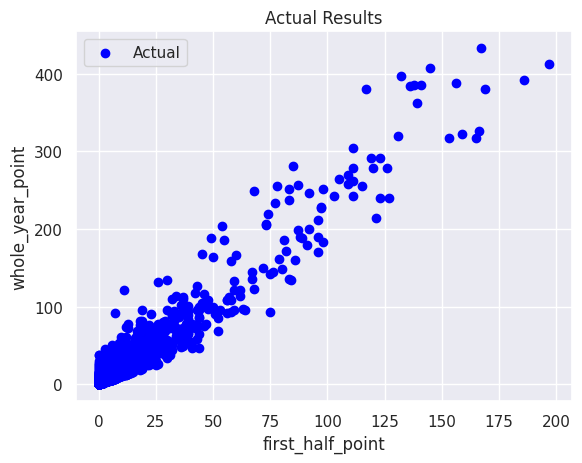

In [40]:
# Scatter plot of actual vs predicted values for the test set
plt.scatter(df_join['first_half_point'], df_join['whole_year_point'], color='blue', label='Actual')

plt.xlabel('first_half_point')
plt.ylabel('whole_year_point')
plt.title('Actual Results')
plt.legend()
plt.show()

## Metrics
Variance score(R^2)
Mean squared error (MSE)
MAPE
Root Mean Squared Error (RMSE)
Mean Absolute Error (MAE)

# 4. Supervised Method

### 4.1.1 Linear Regression

We first decided to look at the Supervised methods accuracy in predicting the "whole_year_points" based on some features.

We first decided to use only the first_half_point_all to predict the whole_year_point.


Cross-validated R^2 scores:
[0.93565334 0.86934577 0.66217652 0.72761321 0.93025729]
Cross Validation R^2: 0.8250092250222509
Standard Deviation: 0.11071176657198852


Train Set
R^2: 0.9351640242067448
MSE: 211.5825297727103
MAPE: 59.27347754687702
RMSE: 14.55
MAE: 7.67

Test Set
R^2: 0.920039132590291
MSE: 187.98514057664192
MAPE: 60.836010968607546
RMSE: 13.71
MAE: 7.34

Cross Validation R^2: 0.8250092250222509


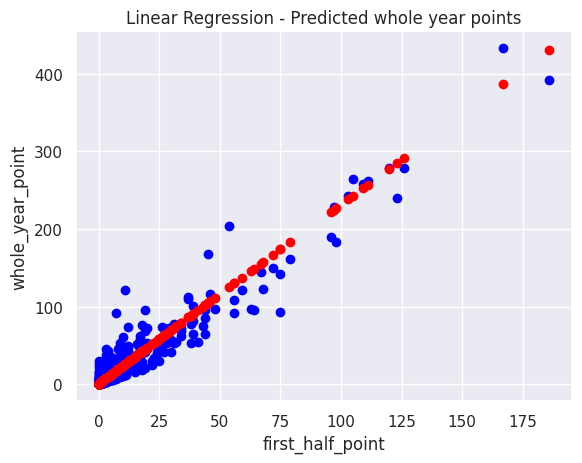

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Extract the features and target variables
X = df_join[['first_half_point']]
y = df_join['whole_year_point']

# Create a Linear Regression model
model = LinearRegression()

# Perform cross-validation and calculate R^2 scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validated R^2 scores
print("Cross-validated R^2 scores:")
print(cv_scores)
print("Cross Validation R^2:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))
print()


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the train and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R^2, MSE, MAPE for the train set
print("\nTrain Set")
print("R^2:", r2_score(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
mask_train = y_train != 0
print("MAPE:", np.mean(np.abs((y_train[mask_train] - y_train_pred[mask_train]) / y_train[mask_train])) * 100)
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MAE: %.2f' % mean_absolute_error(y_train, y_train_pred))

# Calculate R^2, MSE, MAPE for the test set
print("\nTest Set")
print("R^2:", r2_score(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
mask_test = y_test != 0
print("MAPE:", np.mean(np.abs((y_test[mask_test] - y_test_pred[mask_test]) / y_test[mask_test])) * 100)
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MAE: %.2f' % mean_absolute_error(y_test, y_test_pred))
print()
print("Cross Validation R^2:", np.mean(cv_scores))
# Create scatter plot for test set
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_test_pred, color='red')
plt.title('Linear Regression - Predicted whole year points')
plt.xlabel('first_half_point')
plt.ylabel('whole_year_point')
plt.show()


# Liniar regression using features from df_join

the prediction was not that accurate so we introduced more variables to predict, including winRate,fastestLapRate and qualifyingWinRate

Cross-validated R^2 scores:
[0.91552552 0.87835924 0.69234476 0.74400412 0.9261723 ]
Cross Validation R^2: 0.8312811871100383
Standard Deviation: 0.09511928529292123

Coefficients:  [  2.16609543   6.16714196  -8.03323495 104.66578139]
Intercept:  0.6945237200742511

Train Set
R^2: 0.94
MSE: 199.06
RMSE: 14.11
MAE: 7.53
MAPE: 58.03

Test Set
R^2: 0.93
MSE: 178.21
RMSE: 13.35
MAE: 7.09
MAPE: 58.55

Cross Validation R^2: 0.8312811871100383


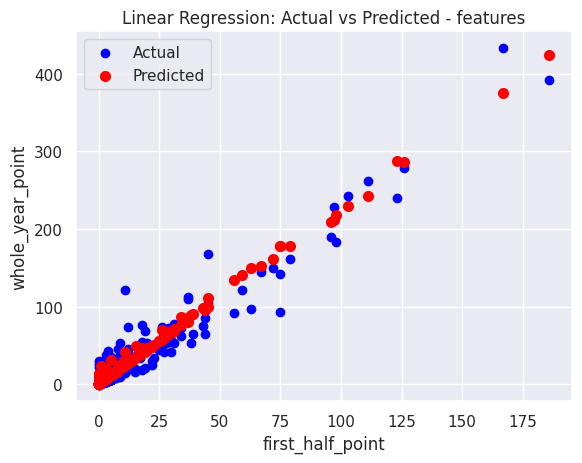

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Ensure the data is in the right format
features = ['first_half_point', 'winRate', 'fastestLapRate', 'qualifyingWinRate']
df_join[features] = df_join[features].apply(pd.to_numeric, errors='coerce')

# Extract the features and target variables
X = df_join[features]
y = df_join['whole_year_point']


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()


# Perform cross-validation and calculate R^2 scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validated R^2 scores
print("Cross-validated R^2 scores:")
print(cv_scores)
print("Cross Validation R^2:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))
print()


# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_train_pred =model.predict(X_train)
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print()
# Output model performance metrics- TRAIN
print("Train Set")
print('R^2: %.2f' % r2_score(y_train, y_train_pred))
print("MSE: %.2f" % mean_squared_error(y_train, y_train_pred))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MAE: %.2f' % mean_absolute_error(y_train, y_train_pred))

mask_t = y_train != 0
mape = np.mean(np.abs((y_train[mask_t] - y_train_pred[mask_t]) / y_train[mask_t])) * 100
print('MAPE: %.2f' % mape)
print()
# Output model performance metrics-TEST
print('Test Set')
print('R^2: %.2f' % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

# Calculate MAPE
mask = y_test != 0
mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100
print('MAPE: %.2f' % mape)
print()
print("Cross Validation R^2:", np.mean(cv_scores))
# Scatter plot of actual vs predicted values for the test set
plt.scatter(X_test['first_half_point'], y_test, color='blue', label='Actual')
plt.scatter(X_test['first_half_point'], y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('first_half_point')
plt.ylabel('whole_year_point')
plt.title('Linear Regression: Actual vs Predicted - features')
plt.legend()
plt.show()

In [43]:
# Convert y_test to DataFrame
#y_test_df = y_test.to_frame()

# Join y_test_df with df_join
#df_predicted = df_join.join(y_test_df, how='inner', rsuffix='_test')


# Polynomial Regression

using only the first_half_point

Train Set
R^2:  0.9354605467706704
MSE:  210.61487264343188
MAPE:  57.416414564685006
MAE:  7.672045609444763

Test Set
R^2:  0.9214741463419769
MSE:  184.61147455001085
MAPE:  59.732181566555475
MAE:  7.339525144530168

Cross-Validation R^2:  0.8250092250222509


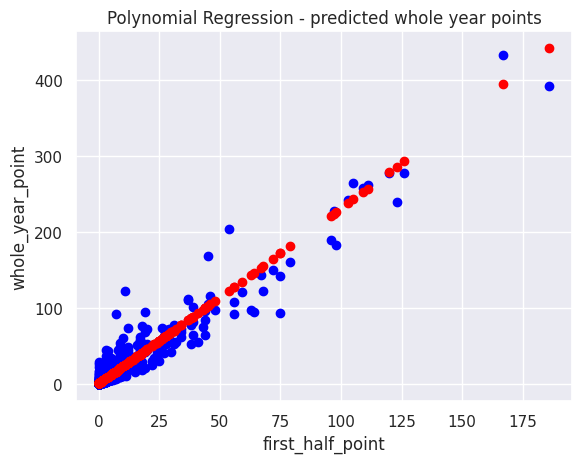

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Extract the features and target variables
X = df_join[['first_half_point']]
y = df_join['whole_year_point']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create polynomial features
degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Make predictions on the train and test set
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate R^2, MSE, MAPE for the train set
print("Train Set")
print("R^2: ", r2_score(y_train, y_train_pred))
print("MSE: ", mean_squared_error(y_train, y_train_pred))
mask_train = y_train != 0
print("MAPE: ", np.mean(np.abs((y_train[mask_train] - y_train_pred[mask_train]) / y_train[mask_train])) * 100)
print("MAE: ", mean_absolute_error(y_train, y_train_pred))

# Calculate R^2, MSE, MAPE for the test set
print("\nTest Set")
print("R^2: ", r2_score(y_test, y_test_pred))
print("MSE: ", mean_squared_error(y_test, y_test_pred))
mask_test = y_test != 0
print("MAPE: ", np.mean(np.abs((y_test[mask_test] - y_test_pred[mask_test]) / y_test[mask_test])) * 100)
print("MAE: ", mean_absolute_error(y_test, y_test_pred))

#Perform cross-validation and calculate R^2
cv_scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print("\nCross-Validation R^2: ", np.mean(cv_scores))

#Create scatter plot for test set
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_test_pred, color='red')
plt.title('Polynomial Regression - predicted whole year points')
plt.xlabel('first_half_point')
plt.ylabel('whole_year_point')
plt.show()


# Polynomial Regression using features

Intercept of Regression 	: b = 0.2509840330709707
Coefficients of Regression 	: a = [ 0.00000000e+00  2.08682734e+00  7.76774167e+01 -5.64369714e+01
  5.59512761e+01 -2.98658008e-03 -2.04841749e+00  1.16291594e+01
 -1.81661312e+00 -1.14536506e+02 -1.06729689e+03  1.22140202e+02
  1.02617139e+03 -4.15033045e+03  2.22549742e+03]

Train Set
R^2: 0.9493890690515083
MSE: 163.76874314521882
MAE: 6.886374057224775
MAPE: inf


Test Set
R^2: 0.9201668979687858
MSE: 230.2916872545942
MAE: 7.768282356827238
MAPE:  60.118504388806414

Cross-Validation R^2: 0.9253178984989381


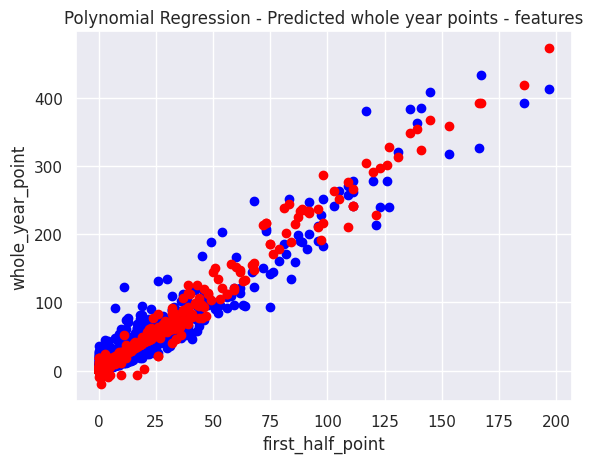

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Define the feature columns
features = ['first_half_point', 'winRate', 'fastestLapRate', 'qualifyingWinRate']

# Split the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(df_join[features], df_join['whole_year_point'], train_size=0.3, random_state=42)

# Define Polynomial Features
polynomial_features = PolynomialFeatures(degree=2)

# Transform both the train and test data
train_x_poly = polynomial_features.fit_transform(train_x)
test_x_poly = polynomial_features.transform(test_x)

# Train the model
polreg = LinearRegression()
polreg.fit(train_x_poly, train_y)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b =', polreg.intercept_)
print('Coefficients of Regression \t: a =', polreg.coef_)
print()

# Predict for both train and test data
train_y_hat = polreg.predict(train_x_poly)
test_y_hat = polreg.predict(test_x_poly)

# Calculate R^2, MSE, MAE, and MAPE for the train set
print("Train Set")
print("R^2:", r2_score(train_y, train_y_hat))
print("MSE:", mean_squared_error(train_y, train_y_hat))
print("MAE:", mean_absolute_error(train_y, train_y_hat))
print("MAPE:", np.mean(np.abs((train_y - train_y_hat) / train_y)) * 100)
print()
# Calculate R^2, MSE, MAE, and MAPE for the test set
print("\nTest Set")
print("R^2:", r2_score(test_y, test_y_hat))
print("MSE:", mean_squared_error(test_y, test_y_hat))
print("MAE:", mean_absolute_error(test_y, test_y_hat))
mask_test = test_y != 0
print("MAPE: ", np.mean(np.abs((test_y[mask_test] - test_y_hat[mask_test]) / test_y[mask_test])) * 100)


# Perform cross-validation and calculate R^2
cv_scores = cross_val_score(polreg, train_x_poly, train_y, scoring='r2', cv=5)
print("\nCross-Validation R^2:", np.mean(cv_scores))

# Create scatter plot for test set
plt.scatter(test_x['first_half_point'], test_y, color='blue')
plt.scatter(test_x['first_half_point'], test_y_hat, color='red')
plt.title('Polynomial Regression - Predicted whole year points - features')
plt.xlabel('first_half_point')
plt.ylabel('whole_year_point')
plt.show()


# Regression tree

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

features = ['first_half_point', 'winRate', 'fastestLapRate', 'qualifyingWinRate']
# Assuming that X and y are your features and target
X = df_join[features] # make sure features are set and dataframe is ready
y = df_join['whole_year_point']

# Create a Decision Tree Regressor model
regressor = DecisionTreeRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(regressor, X, y, cv=6)
# cv=5 means that it will perform 5-fold cross validation, 
# i.e., it will split your data into 5 parts, train on 4 of them and test on the remaining one. 
# This process is done 5 times, each time with a different part used for testing.

# Output model performance metrics
print(cv_scores)
mean= np.mean(cv_scores)
print(mean)
# The output will be an array of scores from each fold of the cross-validation.


[0.86333954 0.77132628 0.75673346 0.61839274 0.38852594 0.8474295 ]
0.7076245757996036


Train Set
R^2: 0.9984437749118867
MSE: 5.035691340883228
MAE: 0.9744808587898217
MAPE: 21.42939134653462

Test Set
R^2: 0.8764926588970788
MSE: 356.2771988967623
MAE: 9.247574575760554
MAPE :  69.77561087950355

Cross-Validation R^2: 0.8414150272680724


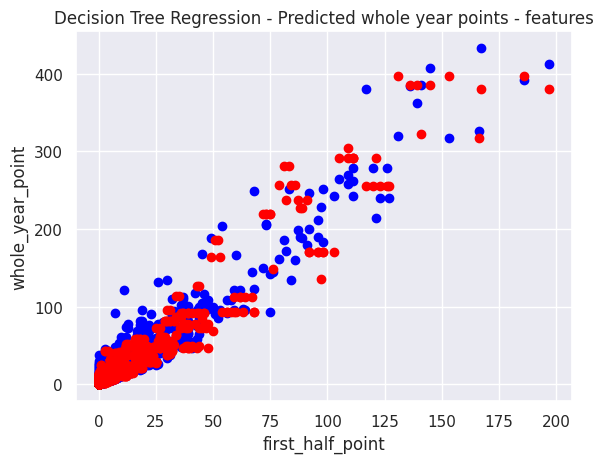

In [47]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Define the feature columns
features = ['first_half_point', 'winRate', 'fastestLapRate', 'qualifyingWinRate']

# Split the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(df_join[features], df_join['whole_year_point'], train_size=0.3, random_state=42)

# Train the model
dtreg = DecisionTreeRegressor(random_state=42)
dtreg.fit(train_x, train_y)

# Predict for both train and test data
train_y_hat = dtreg.predict(train_x)
test_y_hat = dtreg.predict(test_x)

# Calculate R^2, MSE, MAE, and MAPE for the train set
print("Train Set")
print("R^2:", r2_score(train_y, train_y_hat))
print("MSE:", mean_squared_error(train_y, train_y_hat))
print("MAE:", mean_absolute_error(train_y, train_y_hat))
mask_t= train_y != 0
print("MAPE:", np.mean(np.abs((train_y[mask_t] - train_y_hat[mask_t]) / train_y[mask_t])) * 100)

# Calculate R^2, MSE, MAE, and MAPE for the test set
print("\nTest Set")
print("R^2:", r2_score(test_y, test_y_hat))
print("MSE:", mean_squared_error(test_y, test_y_hat))
print("MAE:", mean_absolute_error(test_y, test_y_hat))
mask_test = test_y != 0
print("MAPE : ", np.mean(np.abs((test_y[mask_test] - test_y_hat[mask_test]) / test_y[mask_test])) * 100)

# Perform cross-validation and calculate R^2
cv_scores = cross_val_score(dtreg, train_x, train_y, scoring='r2', cv=5)
print("\nCross-Validation R^2:", np.mean(cv_scores))

# Create scatter plot for test set
plt.scatter(test_x['first_half_point'], test_y, color='blue')
plt.scatter(test_x['first_half_point'], test_y_hat, color='red')
plt.title('Decision Tree Regression - Predicted whole year points - features')
plt.xlabel('first_half_point')
plt.ylabel('whole_year_point')
plt.show()


# Random Forest

R^2: 0.9066236196523321
MAE: 7.939950343269998
MAPE: 72.02237737195358
Cross-validated R^2: 0.8159824249942332


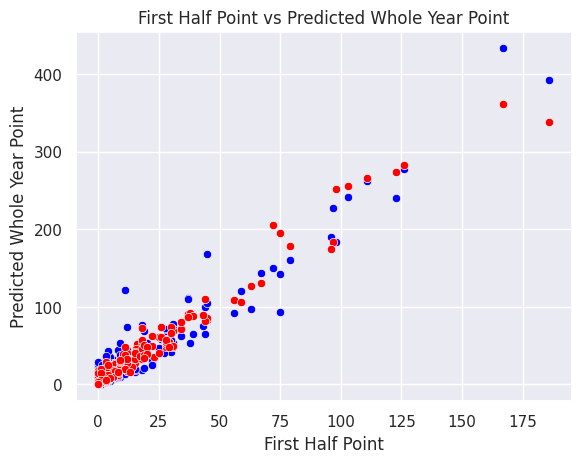

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# assuming df_join is your DataFrame
# and it's already loaded

# specify your features and target
features = ['first_half_point', 'fastestLapRate', 'qualifyingWinRate', 'winRate']
target = 'whole_year_point'

X = df_join[features]
y = df_join[target]

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# make predictions
predictions = model.predict(X_test)

# calculate metrics
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mask_test = y_test != 0
mape = np.mean(np.abs((y_test[mask_test] - predictions[mask_test]) / y_test[mask_test])) * 100

# cross validation for R^2
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

# print the metrics
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'Cross-validated R^2: {np.mean(cv_r2)}')

# create a scatter plot
sns.scatterplot(x=X_test['first_half_point'], y=y_test, color='blue')
sns.scatterplot(x=X_test['first_half_point'], y=predictions, color='red')
plt.xlabel('First Half Point')
plt.ylabel('Predicted Whole Year Point')
plt.title('First Half Point vs Predicted Whole Year Point')
plt.show()


# Deep Learning (Neural Networks)

In [49]:
!pip install scikeras

Cross-validated R^2: 0.9248565750415775
R^2: 0.9290867966333302
MAE: 6.5503322052075665
MAPE: 49.77648405571552


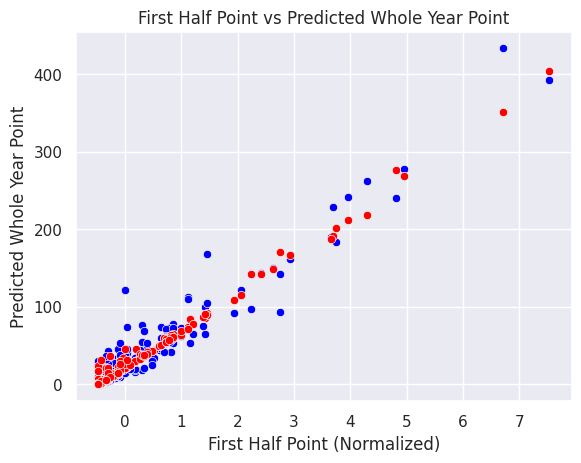

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# assuming df_join is your DataFrame
# and it's already loaded

# specify your features and target
features = ['first_half_point', 'fastestLapRate', 'qualifyingWinRate', 'winRate']
target = 'whole_year_point'

X = df_join[features]
y = df_join[target]

# normalize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# function to create the model, required for KerasRegressor
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=len(features), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

# create the model
model = KerasRegressor(model=create_model, epochs=10, batch_size=32, verbose=0)

# evaluate the model using cross-validation
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=make_scorer(r2_score))
print(f'Cross-validated R^2: {np.mean(results)}')

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions
predictions = model.predict(X_test)

# calculate metrics
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mask_test = y_test != 0
mape = np.mean(np.abs((y_test[mask_test] - predictions.reshape(-1)[mask_test]) / y_test[mask_test])) * 100


# print the metrics
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

# create a scatter plot
sns.scatterplot(x=X_test[:,0], y=y_test, color='blue')
sns.scatterplot(x=X_test[:,0], y=predictions.reshape(-1), color='red')
plt.xlabel('First Half Point (Normalized)')
plt.ylabel('Predicted Whole Year Point')
plt.title('First Half Point vs Predicted Whole Year Point')
plt.show()


<AxesSubplot: >

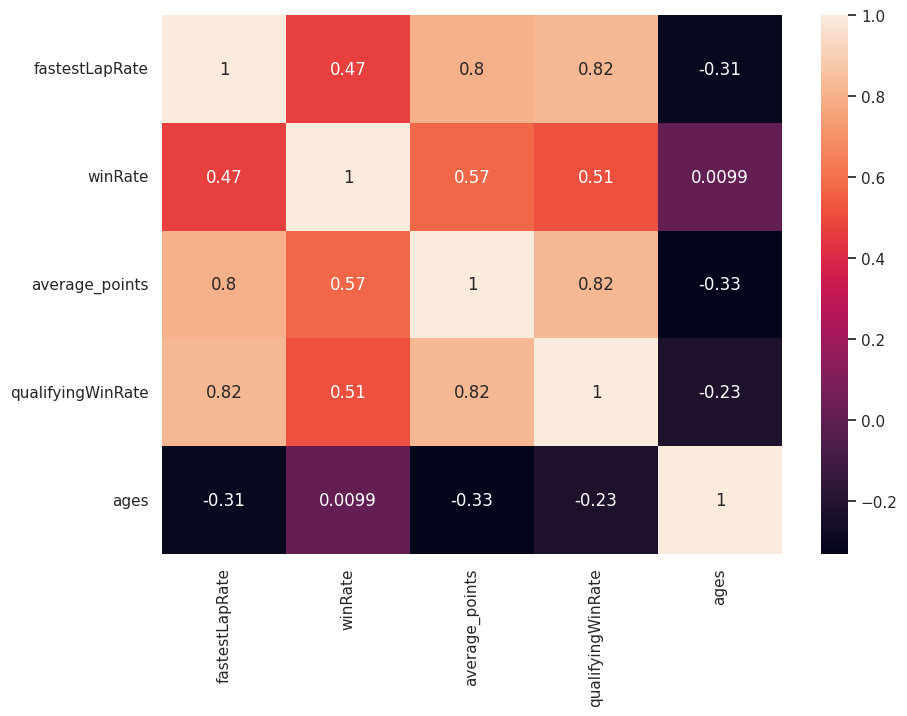

In [51]:
df_disjoin = df_training_data[['fastestLapRate','winRate', 'average_points','qualifyingWinRate' ,'ages']]
plt.figure(figsize=(10,7))
sns.heatmap(df_disjoin.corr(),annot=True)

In [52]:
df_training_data

,driverId,driver_name,ages,totalRaces,winRate,fastestLapRate,qualifyingWinRate,average_points,driver_performance
0,1,Lewis Hamilton,38.0,311.0,0.331190,0.192926,0.340836,269.966667,pro-driver
1,2,Nick Heidfeld,46.0,194.0,0.000000,0.010309,0.005155,23.000000,noob
2,3,Nico Rosberg,38.0,206.0,0.111650,0.097087,0.145631,144.954545,pro-driver
3,4,Fernando Alonso,42.0,361.0,0.088643,0.063712,0.063712,108.473684,pro-driver
4,5,Heikki Kovalainen,42.0,111.0,0.009009,0.018018,0.009009,17.500000,noob
...,...,...,...,...,...,...,...,...,...
434,849,Nicholas Latifi,28.0,61.0,0.000000,0.000000,0.000000,4.500000,noob
435,852,Yuki Tsunoda,23.0,45.0,0.000000,0.000000,0.000000,22.000000,noob
436,853,Nikita Mazepin,24.0,22.0,0.000000,0.000000,0.000000,0.000000,noob
437,854,Mick Schumacher,24.0,44.0,0.000000,0.000000,0.000000,6.000000,noob


In [53]:
#df_training_data = df_training_data.drop(['driver_performance_encoded', 'predicted_cluster','cluster_label'], axis=1)

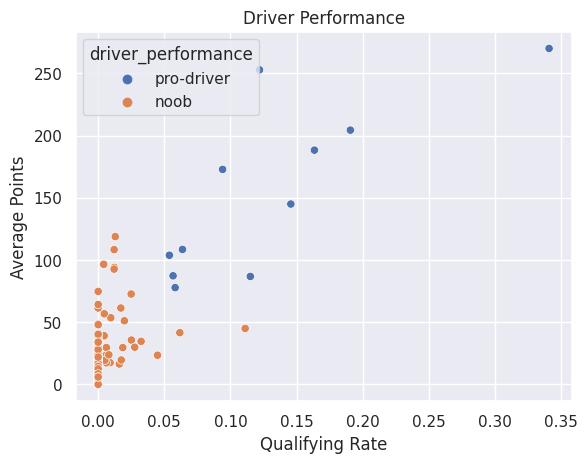

In [54]:
import seaborn as sns

# Visualizing the clusters
sns.scatterplot(x='qualifyingWinRate', y='average_points', hue='driver_performance', data=df_training_data)
plt.xlabel('Qualifying Rate')
plt.ylabel('Average Points')
plt.title('Driver Performance')
plt.show()

# Unsupervised


# K means

K-means rely on distance-based calculations. When features have different scales, those with larger scales can dominate the distance calculations, leading to an unequal contribution of features to the clustering process. Normalization ensures that each feature contributes equally by bringing them to a standardized scale.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


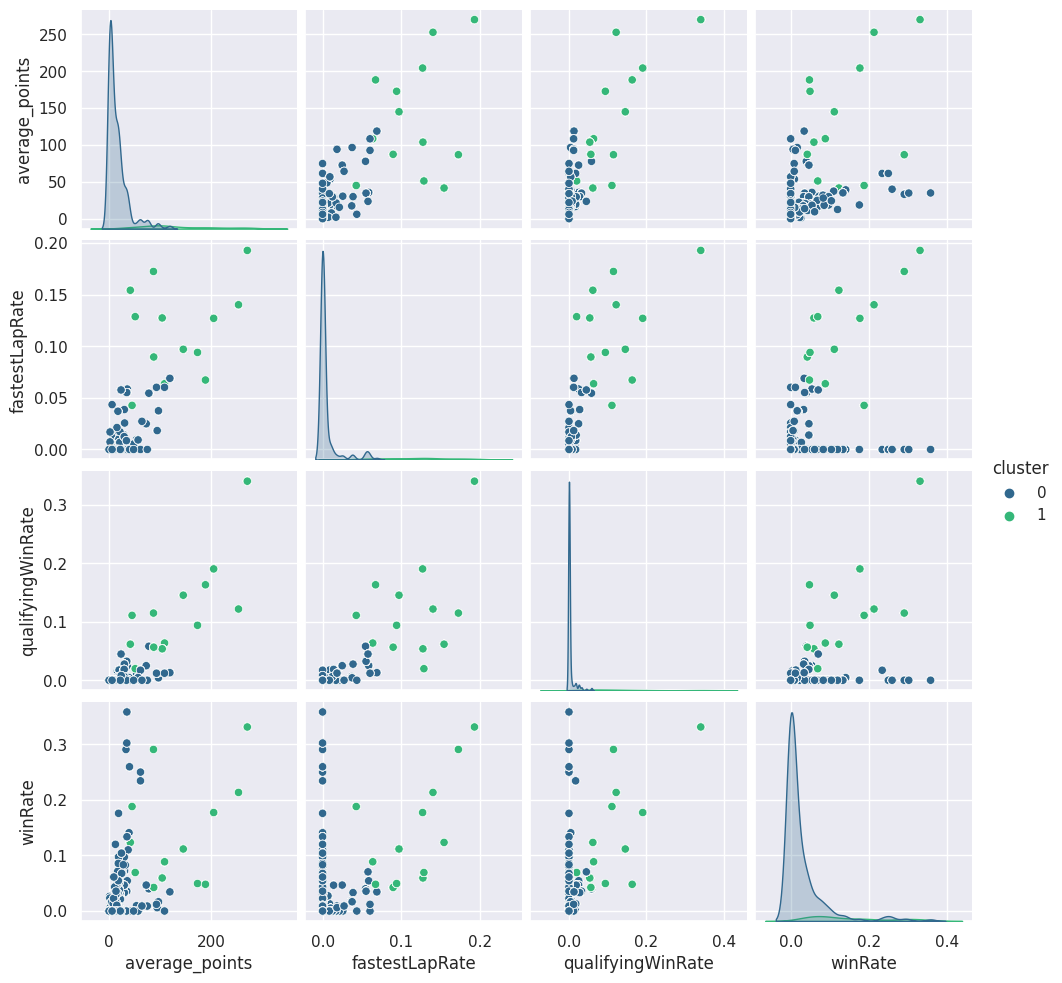

In [55]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# assuming df_join is your DataFrame
# and it's already loaded

# specify your features
features = ['average_points', 'fastestLapRate', 'qualifyingWinRate', 'winRate']

X = df_join[features]

# normalize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# create the KMeans model
kmeans = KMeans(n_clusters=2, random_state=45) # change the number of clusters as you see fit

# fit the model to the data
kmeans.fit(X)

# get the cluster assignments for each data point
clusters = kmeans.predict(X)

# add the cluster assignments to the original DataFrame
df_join['cluster'] = clusters

# plot the clusters
sns.pairplot(df_join, vars=features, hue='cluster', palette='viridis')
plt.show()


In [56]:
df_training_unsupervised = df_training_data.copy()

Silhouette Score:  0.8919364802169079
Davies-Bouldin Index:  0.46499130038268743


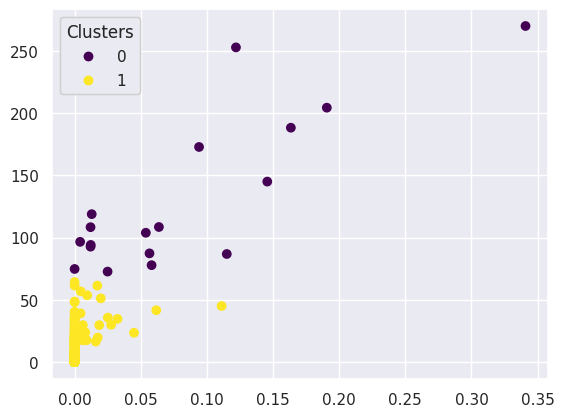

In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_training_data is your DataFrame

# Selecting the features
features = df_training_unsupervised[['average_points', 'fastestLapRate', 'qualifyingWinRate', 'winRate']]

# Encoding the driver_performance column
df_training_unsupervised.loc[df_training_unsupervised['driver_performance'] == "pro-driver", 'driver_performance_encoded'] = 1
df_training_unsupervised.loc[df_training_unsupervised['driver_performance'] != "pro-driver", 'driver_performance_encoded'] = 0


# Creating the kmeans model
kmeans = KMeans(n_clusters=2, n_init=10, init="random")
kmeans.fit(features)

print('Silhouette Score: ', silhouette_score(features, kmeans.labels_))
print('Davies-Bouldin Index: ', davies_bouldin_score(features, kmeans.labels_))


# Adding the predicted clusters to the dataframe
df_training_unsupervised.loc[:, 'predicted_cluster_kmeans'] = kmeans.labels_

colors =['red', 'blue']
# Visualizing the clusters

fig, ax = plt.subplots()

scatter = ax.scatter(df_training_unsupervised['qualifyingWinRate'], df_training_unsupervised['average_points'], c=df_training_unsupervised['predicted_cluster_kmeans'], cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


## K means accuracy

In [58]:
kmeans_label= df_training_unsupervised[df_training_unsupervised['predicted_cluster_kmeans']!= df_training_unsupervised['driver_performance_encoded']]
kmeans_label.shape[0]
error_kmeans= (kmeans_label.shape[0]/df_training_unsupervised.shape[0])*100
print('Kmean Accuracy:', 100 - error_kmeans)

Kmean Accuracy: 1.594533029612748


# DBSCAN

Silhouette Score:  0.8810494668385529
Davies-Bouldin Index:  0.49876499712604005


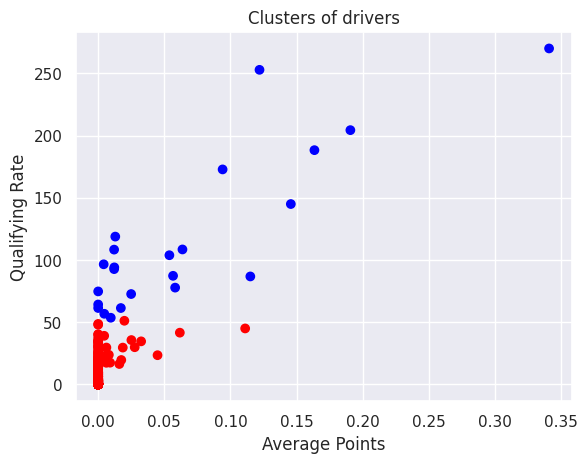

In [59]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Define the features
features = ['average_points', 'fastestLapRate', 'qualifyingWinRate', 'winRate']
X = df_training_unsupervised[features]

from sklearn.preprocessing import RobustScaler

# Normalize the features with RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


# Apply DBSCAN algorithm
# Let's assume that the optimal eps=0.5 and min_samples=5
dbscan = DBSCAN(eps=0.8, min_samples=8).fit(X_scaled)

# Evaluate the clusters
print('Silhouette Score: ', silhouette_score(X_scaled, dbscan.labels_))
print('Davies-Bouldin Index: ', davies_bouldin_score(X_scaled, dbscan.labels_))

# Assign the cluster labels to each data point
df_training_unsupervised['predicted_cluster_dbscan'] = dbscan.labels_
color =['red', 'blue']
# Visualize the clusters using a scatter plot
plt.scatter(df_training_unsupervised['qualifyingWinRate'], df_training_unsupervised['average_points'], c=[colors[label] for label in  df_training_unsupervised['predicted_cluster_dbscan']])


plt.title('Clusters of drivers')
plt.xlabel('Average Points')
plt.ylabel('Qualifying Rate')
plt.show()


## DBSCAN Accuracy

In [60]:
dbscan_label= df_training_unsupervised[df_training_unsupervised['predicted_cluster_dbscan']!= df_training_unsupervised['driver_performance_encoded']]
dbscan_label.shape[0]
error_dbscan= (dbscan_label.shape[0]/df_training_unsupervised.shape[0])*100
print('DBSCAN Accuracy:', 100-error_dbscan)

DBSCAN Accuracy: 94.76082004555809


In [61]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# Prepare the parameters grid
eps_values = np.arange(0.1, 0.9, 0.1)
min_samples_values = np.arange(2, 10, 1)
parameters_grid = [(eps, min_samples) for eps in eps_values for min_samples in min_samples_values]

# Create a list to save silhouette scores for each parameter set
sil_scores = []

# Apply DBSCAN for each parameter set in the grid
for eps, min_samples in parameters_grid:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X_scaled)
    
    # We calculate the silhouette score only for the non-noise labels
    mask_core_and_border_samples = dbscan.labels_ != -1
    unique_labels = np.unique(dbscan.labels_[mask_core_and_border_samples])

    if len(unique_labels) > 1:
        silhouette_avg = silhouette_score(X_scaled[mask_core_and_border_samples], dbscan.labels_[mask_core_and_border_samples])
        sil_scores.append((eps, min_samples, silhouette_avg))

# Create a dataframe for silhouette scores
sil_df = pd.DataFrame(sil_scores, columns=['eps', 'min_samples', 'silhouette_score'])

# Find the parameter set with the highest silhouette score
best_idx = sil_df['silhouette_score'].idxmax()
best_eps, best_min_samples, best_silhouette_score = sil_df.loc[best_idx, ['eps', 'min_samples', 'silhouette_score']]

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_silhouette_score}')


Best eps: 0.8, Best min_samples: 4.0, Best Silhouette Score: 0.8714507119969533


# Hierarchical Clustering (Agglomerative Clustering in this case)

/tmp/ipykernel_21/3835167106.py:23: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, method='average')
/opt/conda/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


Silhouette Score:  0.9136729280778113
Davies-Bouldin Index:  0.2468747766589543
Calinski-Harabasz Index:  639.9745744308395


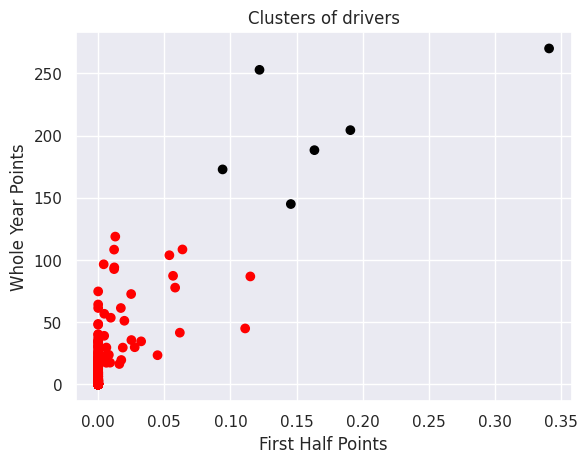

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Define the features
features = ['average_points', 'fastestLapRate', 'qualifyingWinRate', 'winRate']
X = df_training_unsupervised[features]

from sklearn.preprocessing import RobustScaler

# Normalize the features with RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Compute the pairwise Manhattan distance matrix
dist_matrix = cdist(X_scaled, X_scaled, metric='cityblock')

# Compute the linkage matrix using 'average' method with precomputed distances
Z = linkage(dist_matrix, method='average')

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward').fit(dist_matrix)

# Evaluate the clusters
print('Silhouette Score: ', silhouette_score(X_scaled, agg_clustering.labels_))
print('Davies-Bouldin Index: ', davies_bouldin_score(X_scaled, agg_clustering.labels_))
print('Calinski-Harabasz Index: ', calinski_harabasz_score(X_scaled, agg_clustering.labels_))

# Assign the cluster labels to each data point
df_training_unsupervised['predicted_cluster_hc'] = agg_clustering.labels_

# Set colors for the clusters
colors = ['red', 'black']

# Visualize the clusters using a scatter plot
plt.scatter(df_training_unsupervised['qualifyingWinRate'], df_training_unsupervised['average_points'], c=[colors[label] for label in df_training_unsupervised['predicted_cluster_hc']])
plt.title('Clusters of drivers')
plt.xlabel('First Half Points')
plt.ylabel('Whole Year Points')
plt.show()

# Plot the dendrogram
#plt.figure(figsize=(10, 5))
#plt.title('Hierarchical Clustering Dendrogram')
#dendrogram(Z, truncate_mode='level', p=3)
#plt.xlabel("Number of points in node (or index of point if no parenthesis)")
#plt.show()


## Hierarchical Clustering

In [63]:
hierarchical_label= df_training_unsupervised[df_training_unsupervised['predicted_cluster_hc']!= df_training_unsupervised['driver_performance_encoded']]
hierarchical_label.shape[0]
error_hierarchical= (hierarchical_label.shape[0]/df_training_unsupervised.shape[0])*100
print('Hierarchical Accuracy:', 100-error_hierarchical)

Hierarchical Accuracy: 98.86104783599089


# Supervised Methods - Classification 

Now we are going to use the Regression Tree to perform a classification 

In [64]:
#df_training_data = df_training_data.drop(['driver_performance_encoded'], axis=1)

In [65]:
#df_j = df_training_data[['driverId', 'driver_performance']]
#df_joined = df_j.merge(df_training_data, on='driverId')

In [66]:
df_pro_driver = df_training_data[df_training_data['driver_performance']=='pro-driver']
df_pro_driver

,driverId,driver_name,ages,totalRaces,winRate,fastestLapRate,qualifyingWinRate,average_points,driver_performance
0,1,Lewis Hamilton,38.0,311.0,0.331190,0.192926,0.340836,269.966667,pro-driver
2,3,Nico Rosberg,38.0,206.0,0.111650,0.097087,0.145631,144.954545,pro-driver
3,4,Fernando Alonso,42.0,361.0,0.088643,0.063712,0.063712,108.473684,pro-driver
7,8,Kimi Räikkönen,44.0,353.0,0.059490,0.127479,0.053824,103.833333,pro-driver
12,13,Felipe Massa,42.0,275.0,0.040000,0.054545,0.058182,77.800000,pro-driver
16,17,Mark Webber,47.0,212.0,0.042453,0.089623,0.056604,87.291667,pro-driver
19,20,Sebastian Vettel,36.0,299.0,0.177258,0.127090,0.190635,204.333333,pro-driver
27,30,Michael Schumacher,54.0,313.0,0.290735,0.172524,0.115016,86.777778,pro-driver
409,822,Valtteri Bottas,34.0,202.0,0.049505,0.094059,0.094059,172.777778,pro-driver
416,830,Max Verstappen,26.0,164.0,0.213415,0.140244,0.121951,252.785714,pro-driver


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# Assuming these are the relevant features for prediction
features = ['average_points','winRate', 'fastestLapRate', 'qualifyingWinRate']

# Split data into training set and test set
X = df_training_data[features]
y = df_training_data['driver_performance']

# Encoding the 'label' column
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc = SVC(kernel='linear', random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(svc, X, y, cv=5)

# Print the accuracy for each fold
print("Cross-Validation Accuracy Scores:", scores)

# And the mean accuracy of all 5 folds
print("Mean Cross-Validation Accuracy:", scores.mean())

# Training the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict the test set results
y_pred = clf.predict(X_test)

# Print the evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.98863636 0.97727273 0.98863636 0.98863636 0.94252874]
Mean Cross-Validation Accuracy: 0.9771421107628004
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00         2

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88

Confusion Matrix:
[[86  0]
 [ 0  2]]
Accuracy Score:
1.0


## RandomForest  Accuracy

In [68]:
random_forest_label= y_test[y_test!= y_pred] 
random_forest_label.shape[0]
error_random= (random_forest_label.shape[0]/y_test.shape[0])*100
print('RandomForest  Accuracy:', 100-error_random)

RandomForest  Accuracy: 100.0


     driverId       driver_name
0           1    Lewis Hamilton
19         20  Sebastian Vettel
429       844   Charles Leclerc
16         17       Mark Webber
3           4   Fernando Alonso
7           8    Kimi Räikkönen
409       822   Valtteri Bottas


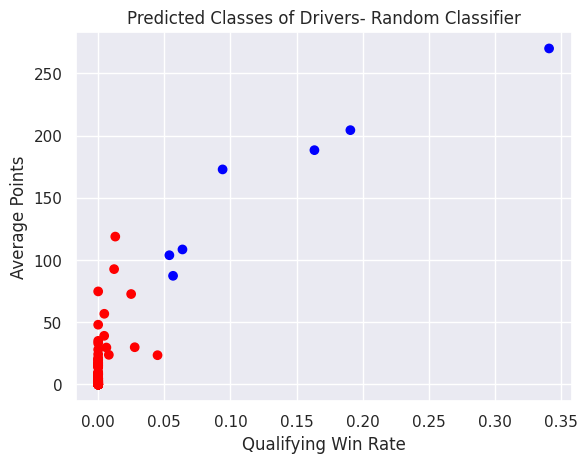

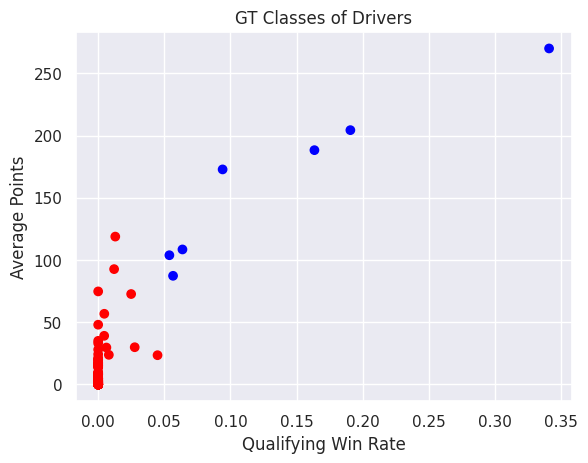

In [69]:
# First, make sure to keep the driverId, surname, and forename in your train-test split:
X_train, X_test, y_train, y_test = train_test_split(df_training_data[['driverId', 'driver_name'] + features], y, test_size=0.3, random_state=42)

# Train and predict as before:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train.drop(['driverId', 'driver_name'], axis=1), y_train)
y_pred = clf.predict(X_test.drop(['driverId', 'driver_name'], axis=1))

# Add the predictions to the test set:
X_test = X_test.copy()
X_test['predicted_label'] = le.inverse_transform(y_pred)

# Now, you can filter the test set to show only the drivers predicted as 'winner':
winners = X_test[X_test['predicted_label'] == 'pro-driver']


# Drop drivers with age above 40
#winners = winners[winners['age_y'] <= 40]
# Print the driverIds, surnames and forenames predicted as 'winner':
print(winners[['driverId', 'driver_name']])

import matplotlib.pyplot as plt

# Define the colors for your classes. Modify this according to the classes in your data.
colors = {1: 'blue', 0: 'red'}

plt.scatter(X_test['qualifyingWinRate'], X_test['average_points'], c=[colors[label] for label in y_pred])
plt.title('Predicted Classes of Drivers- Random Classifier')
plt.xlabel('Qualifying Win Rate')
plt.ylabel('Average Points')
plt.show()

plt.scatter(X_test['qualifyingWinRate'], X_test['average_points'], c=[colors[label] for label in y_test])
plt.title('GT Classes of Drivers')
plt.xlabel('Qualifying Win Rate')
plt.ylabel('Average Points')
plt.show()


# Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       125
           1       0.83      0.71      0.77         7

    accuracy                           0.98       132
   macro avg       0.91      0.85      0.88       132
weighted avg       0.98      0.98      0.98       132


Confusion Matrix:
[[124   1]
 [  2   5]]

Accuracy Score:
0.9772727272727273

Cross-Validation Scores:
[1.         1.         0.98701299 0.97368421]
Mean CV Accuracy:
0.9901742993848257

     driverId       driver_name
404       817  Daniel Ricciardo
0           1    Lewis Hamilton
19         20  Sebastian Vettel
429       844   Charles Leclerc
3           4   Fernando Alonso
409       822   Valtteri Bottas



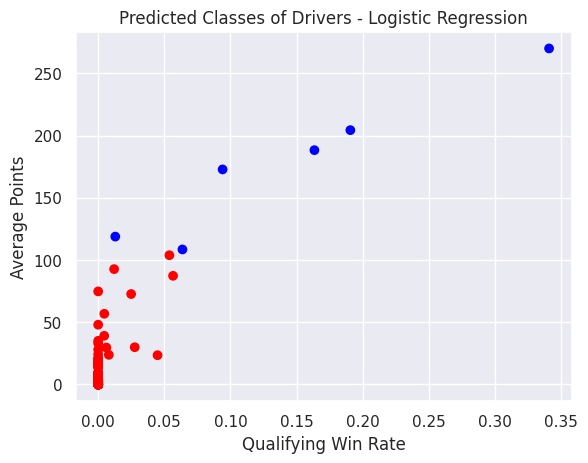

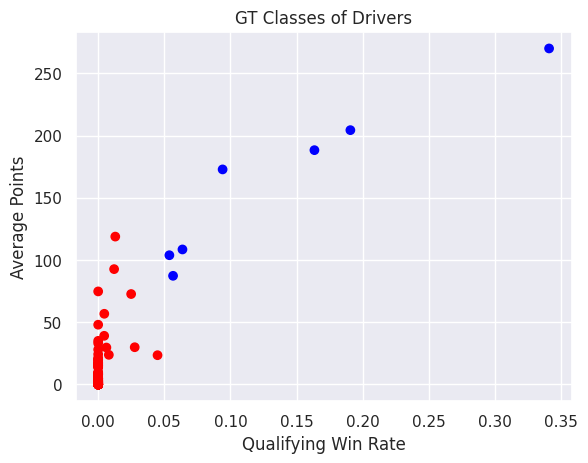

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Split data into training set and test set, including driverId and driver_name
X_train, X_test, y_train, y_test = train_test_split(df_training_data[['driverId', 'driver_name'] + features], y, test_size=0.3, random_state=42)

# Create a Logistic Regression classifier
logreg = LogisticRegression(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(logreg, X_train.drop(['driverId', 'driver_name'], axis=1), y_train, cv=4)

# Train the classifier
logreg.fit(X_train.drop(['driverId', 'driver_name'], axis=1), y_train)

# Predict the test set results
y_pred = logreg.predict(X_test.drop(['driverId', 'driver_name'], axis=1))

# Print the evaluation metrics for the logistic regression model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
print()
# Print cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Accuracy:")
print(cv_scores.mean())
print()
# Add the predictions to the test set
X_test['predicted_label'] = le.inverse_transform(y_pred)

# Filter the test set to show only the drivers predicted as 'pro-driver'
winners = X_test[X_test['predicted_label'] == 'pro-driver']

# Print the driverIds and driver_names predicted as 'pro-driver'
print(winners[['driverId', 'driver_name']])

print()
# Define the colors for your classes. Modify this according to the classes in your data.
colors = {1: 'blue', 0: 'red'}

plt.scatter(X_test['qualifyingWinRate'], X_test['average_points'], c=[colors[label] for label in y_pred])
plt.title('Predicted Classes of Drivers - Logistic Regression')
plt.xlabel('Qualifying Win Rate')
plt.ylabel('Average Points')
plt.show()

plt.scatter(X_test['qualifyingWinRate'], X_test['average_points'], c=[colors[label] for label in y_test])
plt.title('GT Classes of Drivers')
plt.xlabel('Qualifying Win Rate')
plt.ylabel('Average Points')
plt.show()


## Logistic Accuracy

In [71]:
logistic_label= y_test[y_test!= y_pred] 
logistic_label.shape[0]
error_logistic= (logistic_label.shape[0]/y_test.shape[0])*100
print('Logistic Accuracy:', 100-error_logistic)

Logistic Accuracy: 97.72727272727273


# Support Vector Classifier (SVC)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       125
           1       1.00      0.57      0.73         7

    accuracy                           0.98       132
   macro avg       0.99      0.79      0.86       132
weighted avg       0.98      0.98      0.97       132

Confusion Matrix:
[[125   0]
 [  3   4]]
Accuracy Score:
0.9772727272727273

     driverId       driver_name
0           1    Lewis Hamilton
19         20  Sebastian Vettel
429       844   Charles Leclerc
409       822   Valtteri Bottas


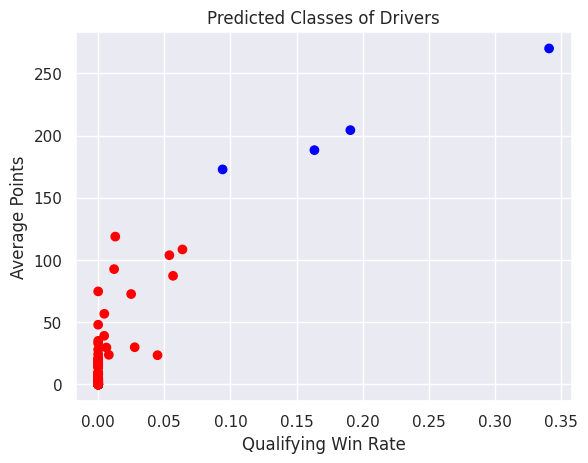

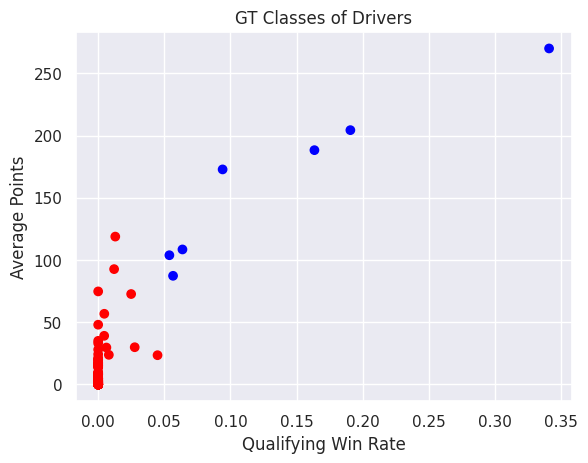

In [72]:
from sklearn.svm import SVC

# Train and predict as before, but now with SVC:
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train.drop(['driverId', 'driver_name'], axis=1), y_train)

# Remove the 'predicted_label' column from X_test, if present
X_test = X_test.drop('predicted_label', axis=1)

# Perform prediction using the trained SVC model
y_pred = svc.predict(X_test.drop(['driverId', 'driver_name'], axis=1))

# Add the predictions to the test set:
X_test['predicted_label'] = le.inverse_transform(y_pred)
# Print the evaluation metrics for the logistic regression model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
print()
# Now, you can filter the test set to show only the drivers predicted as 'winner':
winners = X_test[X_test['predicted_label'] == 'pro-driver']

# Print the driverIds, surnames and forenames predicted as 'winner':
print(winners[['driverId', 'driver_name']])
import matplotlib.pyplot as plt

# Define the colors for your classes. Modify this according to the classes in your data.
colors = {1: 'blue', 0: 'red'}

plt.scatter(X_test['qualifyingWinRate'], X_test['average_points'], c=[colors[label] for label in y_pred])
plt.title('Predicted Classes of Drivers')
plt.xlabel('Qualifying Win Rate')
plt.ylabel('Average Points')
plt.show()

plt.scatter(X_test['qualifyingWinRate'], X_test['average_points'], c=[colors[label] for label in y_test])
plt.title('GT Classes of Drivers')
plt.xlabel('Qualifying Win Rate')
plt.ylabel('Average Points')
plt.show()


## SVC  Accuracy

In [73]:
svc_label= y_test[y_test!= y_pred] 
svc_label.shape[0]
error_svc= (svc_label.shape[0]/y_test.shape[0])*100
print('SVC  Accuracy:', 100-error_svc)

SVC  Accuracy: 97.72727272727273


 calcul indice general
 alt set de date
